In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\jbnay\Downloads\train_loan (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

# Preprocessing

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Missing value handling

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

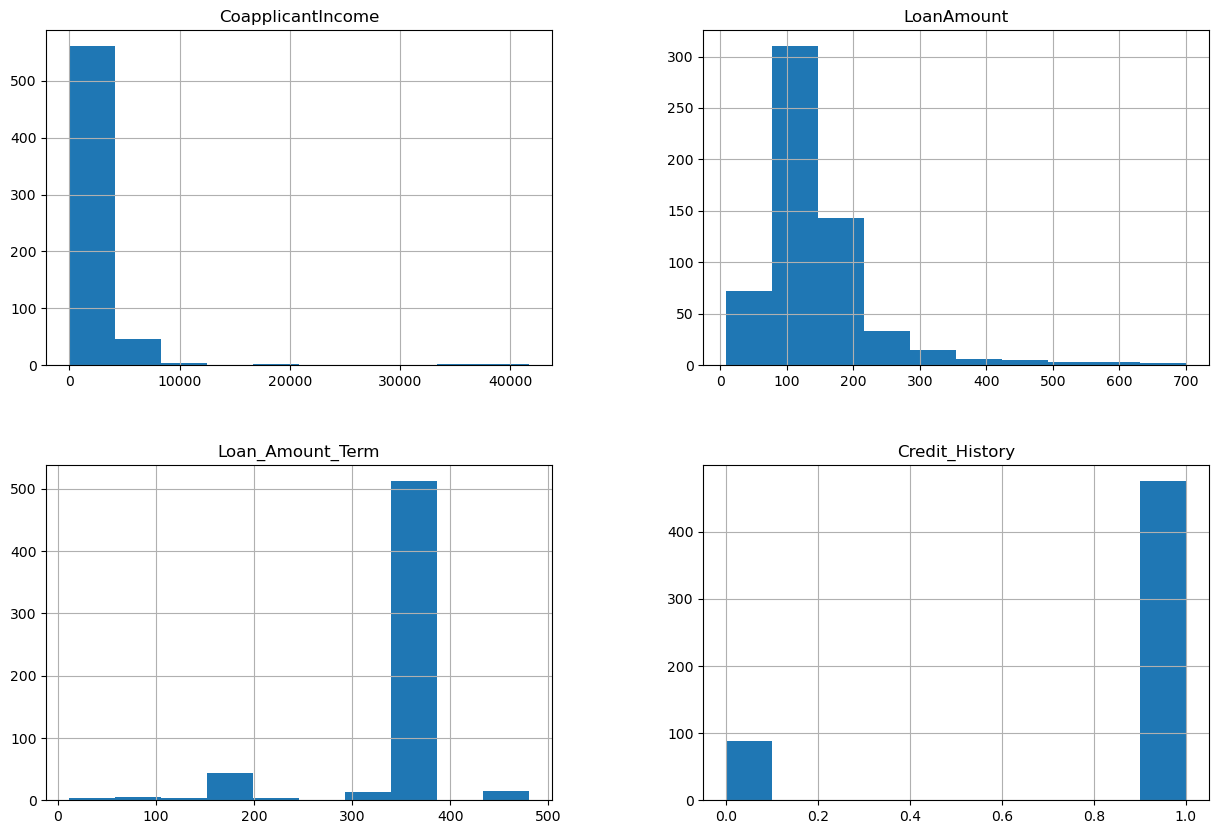

In [7]:
frequency_graph = data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(15,10))
plt.show()

In [8]:
#numerical_values
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna( data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna( data['Credit_History'].median())

In [9]:
# categorical_data
data['Gender'] = data['Gender'].fillna( data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna( data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna( data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna( data['Self_Employed'].mode()[0])

In [10]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
num_cols = [['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

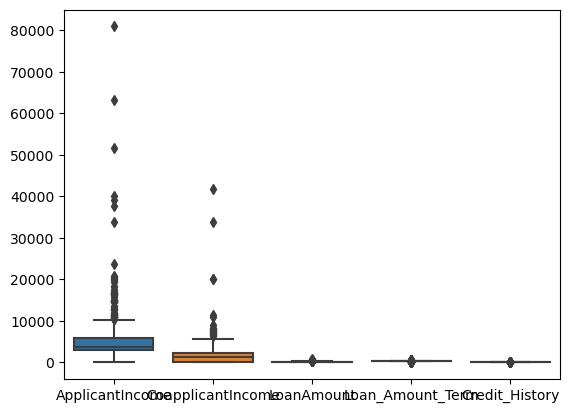

In [13]:
for i in num_cols:
    sns.boxplot(data[i])
   
    plt.show()

In [14]:
#ApplicantIncome
q1 = data['ApplicantIncome'].quantile(.25)
q2 = data['ApplicantIncome'].quantile(.50)
q3 = data['ApplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2917.5


In [15]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

10171.25 -1498.75


In [16]:
#outlier handling by capping

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [17]:
data['ApplicantIncome'] =data['ApplicantIncome'].apply(limit_imputer)

<Axes: >

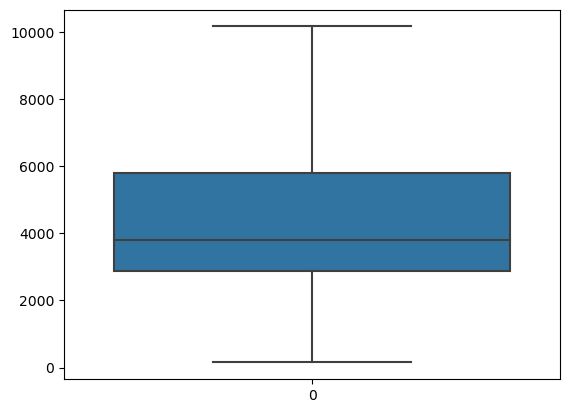

In [18]:
sns.boxplot(data['ApplicantIncome'])

In [19]:
data['ApplicantIncome'].describe()

count      614.000000
mean      4617.111564
std       2479.851729
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      10171.250000
Name: ApplicantIncome, dtype: float64

In [20]:
#coapplicantIncome
q1 = data['CoapplicantIncome'].quantile(.25)
q2 = data['CoapplicantIncome'].quantile(.50)
q3 = data['CoapplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2297.25


In [21]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

5743.125 -3445.875


In [22]:
#outlier handling by capping

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [23]:
data['CoapplicantIncome'] =data['CoapplicantIncome'].apply(limit_imputer)

In [24]:
#LoanAmount
q1 = data['LoanAmount'].quantile(.25)
q2 = data['LoanAmount'].quantile(.50)
q3 = data['LoanAmount'].quantile(.75)

iqr = q3-q1
print(iqr)

64.5


In [25]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

261.5 3.5


In [26]:
#outlier handling by capping

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [27]:
data['LoanAmount'] =data['LoanAmount'].apply(limit_imputer)

In [28]:
#dropping unncessary column
data.drop(['Loan_ID'],inplace = True,axis=1)

In [29]:
x= data.drop(['Loan_Status'],axis = 1)
y = data['Loan_Status']

In [30]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


In [31]:
# Encoding - One-Hot Encoding

x = pd.get_dummies(x)

In [32]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [33]:
# splitting

from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.25,random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier(criterion ='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
y_pred = clf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print('Accuacy=',accuracy_score(y_test,y_pred))

Accuacy= 0.6883116883116883




3. Applying Ensembling learning techniques



In [40]:
#applying decision tree as base model

In [41]:
#Bagging method

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
tree = DecisionTreeClassifier()

In [44]:
bagging_clf = BaggingClassifier(estimator=tree,n_estimators =100, random_state=42)

In [45]:
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [46]:
y_pred_bg =bagging_clf.predict(x_test)

In [47]:
print('Accuacy=',accuracy_score(y_test,y_pred_bg))

Accuacy= 0.7597402597402597


In [48]:
# RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =100)

In [50]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = clf.predict(x_test)

In [52]:
print('Accuacy=',accuracy_score(y_test,y_pred_rf))

Accuacy= 0.7597402597402597


In [53]:
# Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators =1)

In [55]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [56]:
y_pred_ada = ada_clf.predict(x_test)

In [57]:
print('Accuacy=',accuracy_score(y_test,y_pred_ada))

Accuacy= 0.7727272727272727


In [58]:
#GradientBoostingClassifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth =3,random_state=42)
gb_clf.fit(x_train,y_train)


GradientBoostingClassifier(random_state=42)

In [60]:
y_pred_gb = clf.predict(x_test)

In [61]:
print('Accuacy=',accuracy_score(y_test,y_pred_gb))

Accuacy= 0.7597402597402597
